In [1]:
import os
os.chdir('../app')

In [2]:
import numpy as np
from pymongo import MongoClient, UpdateMany, UpdateOne, InsertOne
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import math

In [3]:
import copy
import pandas as pd
import matplotlib.dates as mdates

/opt/conda/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
from matplotlib import rc

In [5]:
import preprocessing.preglobal as pg
import frontend.stock_analytics as salib
import lob.lob as loblib 

In [6]:
plt.rcParams["figure.figsize"] = (15,5)

In [7]:
def graph_pre(size=1):
    rc('font',**{'family':'serif','serif':['Times']})
    rc('text', usetex=True)
    h = [0,3,5][size]
    
    plt.rcParams["figure.figsize"] = (7.5,h)
    
def graph_post():
    plt.tight_layout()

In [8]:
salib.tic()
# Load all Graphs
sa_array = []
for i in pg.get_kn_entries({'selected':1}):
    print('load',i['id'])
    sa_array.append({'kn':i,'sa':salib.stock_analytics(i['id'], gui_mode=False)})
sa = sa_array[0]['sa']
salib.toc()

mongo mongodb://192.168.0.94:27017/
load 20190910_AAPL
redis 192.168.0.94
load 20190325_AAPL
redis 192.168.0.94
load 20181030_AAPL
redis 192.168.0.94
load 20180912_AAPL
redis 192.168.0.94
load 20180604_AAPL
redis 192.168.0.94
load 20180327_AAPL
redis 192.168.0.94
load 20170912_AAPL
redis 192.168.0.94
load 20170605_AAPL
redis 192.168.0.94
load 20161027_AAPL
redis 192.168.0.94
load 20160907_AAPL
redis 192.168.0.94
load 20160613_AAPL
redis 192.168.0.94
load 20160321_AAPL
redis 192.168.0.94
load 20150909_AAPL
redis 192.168.0.94
load 20150608_AAPL
redis 192.168.0.94
load 20150309_AAPL
redis 192.168.0.94
Elapsed time: 0.046663459041155875s


In [9]:
folder = "Thesis/generated_figures/"

In [10]:
salib.time_as_string = False
filte = copy.deepcopy(sa.filters['default'])

In [11]:
def draw_graph_2d_3(g,f, draw=True, normalize=False, mapf=None):
    res = []
    xaxis = []
    yaxis = []
    fig,ax = plt.subplots()
    
    for sa in sa_array:
        t = sa['sa'].calculate_graph(g,f, histogram=True)
        xaxis.append(t[0])
        res.append(t[1])
        yaxis.append(sa['kn']['id'])
    res = np.array(res)
    
    
    if not draw:
        return res, xaxis, yaxis
    
    if mapf:
        for i in range(len(res)):
            res[i] = mapf(res[i])
            
    if normalize:
        for i in range(len(res)):
            res[i] /= res[i].mean()


    

    myFmt = mdates.DateFormatter('%H:%M:%S')
    g_stop = 0
    g_start = 0
    g_xaxis = xaxis[0]
    g_yaxis = np.zeros(len(g_xaxis))
    g_n = 0
    for i in range(len(res)):

        sa = sa_array[i]

        if sa['kn']['time_mapping'][0]['stock_time_start'] < 12.5*3600*1000:
            print('skip kn')
            continue
            
        g_n+=1
        assert (g_xaxis == xaxis[i])
  
        g_yaxis += np.array(res[i])
        #ax.plot(xaxis[i],res[i])
        ax.xaxis.set_major_formatter(myFmt)
        g_stop+=sa['kn']['time_mapping'][-1]['stock_time_end']
        g_start+=sa['kn']['time_mapping'][-1]['stock_time_start']
       

    dt = ((g_xaxis[1]-g_xaxis[0]).total_seconds())
    
    
    ax.bar(g_xaxis,g_yaxis/(dt*g_n),width=0.001)

    
    ax.axvline(linewidth=1, x=salib.to_date_i(g_stop/g_n), color='r')
    ax.axvline(linewidth=1, x=salib.to_date_i(g_start/g_n), color='r')
    ax.axvline(linewidth=1, x=salib.to_date_i(10.5*3600*1000), color='r')
    ax.axvline(linewidth=1, x=salib.to_date_i(15.5*3600*1000), color='r')
    return fig,ax

skip kn
skip kn


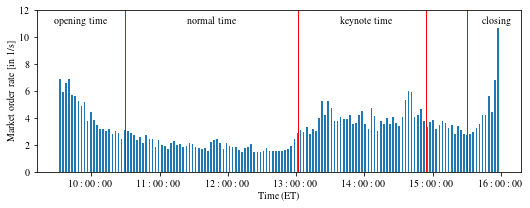

In [13]:
graph_pre()


filte['numbins']=75
filte['range']['time'] = [9.5*3600*1000, 16.*3600*1000]
fig,axs = draw_graph_2d_3(sa.graphlist['marketorder_num'], filte, normalize=False)  
axs.set_ylabel('Market order rate [in 1/s]')


axs.text(0.09,0.93, 'opening time', horizontalalignment='center',
     verticalalignment='center', transform=axs.transAxes)
axs.text(0.36,0.93, 'normal time', horizontalalignment='center',
     verticalalignment='center', transform=axs.transAxes)
axs.text(0.68,0.93, 'keynote time', horizontalalignment='center',
     verticalalignment='center', transform=axs.transAxes)
axs.text(0.95,0.93, 'closing', horizontalalignment='center',
     verticalalignment='center', transform=axs.transAxes)
axs.set_ylim([0, 12])
axs.set_xlabel('Time (ET)')

graph_post()
fig.savefig(folder+"res_lob20.pdf")



In [15]:
def draw_graph_2d_2(ax,g,f, draw=True, normalize=False, mapf=None,axright=False, normdt=False):
    res = []
    xaxis = []
    yaxis = []
    
    
    for sa in sa_array:
        t = sa['sa'].calculate_graph(g,f, histogram=True)

        xaxis.append(t[0])
        res.append(t[1])
        yaxis.append(sa['kn']['id'])
    res = np.array(res)
    if not draw:
        return res, xaxis, yaxis
    
    if mapf:
        for i in range(len(res)):
            res[i] = mapf(res[i])
            
    if normalize:
        for i in range(len(res)):
            res[i] /= res[i].mean()


    
    

    g_xaxis = xaxis[0]
    g_yaxis = []
    g_n = 0
    for i in range(len(res)):
       
        sa = sa_array[i]

        if sa['kn']['time_mapping'][0]['stock_time_start'] < 12.5*3600*1000:
            print('skip kn')
            continue
            
        g_n+=1
        assert (g_xaxis == xaxis[i])
  
        g_yaxis.append( np.array(res[i]) )

        myFmt = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_formatter(myFmt)
       

    if normdt:    
        dt = ((g_xaxis[1]-g_xaxis[0]).total_seconds())
        g_yaxis = np.array(g_yaxis)
        g_yaxis /= dt
    
        
    xmean = np.array(g_yaxis).mean(axis=0)
    xstd = np.array(g_yaxis).std(axis=0)
    ax.plot(g_xaxis,xmean,'.')
    ax.fill_between(g_xaxis, xmean-xstd, xmean+xstd, color='grey')

    if axright:
        ax.yaxis.tick_right()
        ax.yaxis.labelpad = 15
        ax.yaxis.set_label_position("right")
    
    ax.set_ylim([0,None])

    


skip kn
skip kn
skip kn
skip kn
skip kn
skip kn
skip kn
skip kn


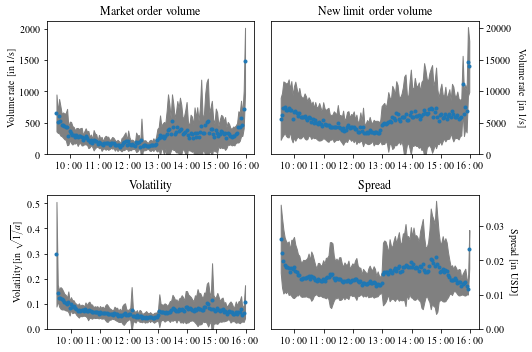

In [16]:
graph_pre(size=2)
filte['numbins']=100
filte['range']['time'] = [9.5*3600*1000, 16.*3600*1000] 
fig,axs = plt.subplots(2,2)
axs[0][0].set_title('Market order volume')
axs[0][0].set_ylabel('Volume rate [in 1/s]')
draw_graph_2d_2(axs[0][0],sa.graphlist['marketorder_vis'], filte, normalize=False, normdt=True)  

axs[0][1].set_title('New limit order volume')
axs[0][1].set_ylabel('Volume rate [in 1/s]', rotation=270)
draw_graph_2d_2(axs[0][1],sa.graphlist['limitorder'], filte, normalize=False,axright=True, normdt=True)  

axs[1][0].set_title('Volatility')
axs[1][0].set_ylabel('Volatility [in $\sqrt{1/a}$]')
draw_graph_2d_2(axs[1][0],sa.graphlist['volatility'], filte, normalize=False)  

axs[1][1].set_title('Spread')
axs[1][1].set_ylabel('Spread [in USD]', rotation=270)
draw_graph_2d_2(axs[1][1],sa.graphlist['spread'], filte, normalize=False,axright=True)   
graph_post()
fig.savefig(folder+"res_lob21.pdf")

In [ ]:
def dobins(ts_array, N = 1000, useinteger=False, stepsize=None):
    ts_array.sort()
   
    x_bins = None
    if useinteger:
        minp = math.floor(ts_array[0])
        maxp = math.ceil(ts_array[-1])
        steps = stepsize if stepsize else np.ceil((maxp-minp)/N)
        
        x_bins = np.arange(minp, maxp+0.1, steps)
        N = len(x_bins)-1
        
    elif stepsize is None:
        x_bins = np.linspace(ts_array[0], ts_array[-1], N+1)
    else:
        x_bins = np.arange(ts_array[0], ts_array[-1], stepsize)
        N = len(x_bins)-1
     
    dt = x_bins[1]-x_bins[0]
    x_bins = x_bins[:-1]
    y_bins = np.zeros(len(x_bins))
    
    unique, counts = np.unique(np.floor((ts_array-x_bins[0])/dt), return_counts=True)
    unique = unique[:-1]
    y_bins[unique.astype(int)] = counts[:-1]
    

    E  = y_bins.mean()
    V = y_bins.var()
    return x_bins, y_bins, V/E

In [ ]:
plt.rcParams["figure.figsize"] = (7.5,3)

ts_array_before = []
ts_array_keynote = []

for sa_i in sa_array:
    knend = sa_i['kn']['time_mapping'][0]['stock_time_end']
    knstart = sa_i['kn']['time_mapping'][0]['stock_time_start']
    if knstart < 12.5*3600*1000:
        print('skip kn')
        continue
        
    t = sa_i['sa'].ticks.aggregate([{"$match":{"type":{"$in":['execute', 'fill'
                                                             ]},"timestamp":{"$gt":10.5*3600*1000, "$lt":knend}}},
                                    {"$project":{"timestamp":1,"ask":1,"bid":1}}])
    ts_array_keynote.extend( [ a['ask']-a['bid'] for a in t if a['timestamp'] > knstart])
    ts_array_before.extend( [ a['ask']-a['bid'] for a in t if a['timestamp'] < knstart])

ts_array_before = np.array(ts_array_before)/100 #Spread at execution
spread_a,spread_b,_ = dobins(ts_array_before,useinteger=True)

ts_array_keynote = np.array(ts_array_keynote)/100 #Spread at execution
spread_a_kn,spread_b_kn,_ = dobins(ts_array_keynote,useinteger=True)


skip kn
skip kn


In [ ]:
ts_array_before = []
ts_array_keynote = []
for sa_i in sa_array:
    knend = sa_i['kn']['time_mapping'][0]['stock_time_end']
    knstart = sa_i['kn']['time_mapping'][0]['stock_time_start']
    if knstart < 12.5*3600*1000:
        print('skip kn')
        continue
    t = sa_i['sa'].ticks.aggregate([{"$match":{"type":{"$in":['execute', 'fill'
                                                             ]},"timestamp":{"$gt":10.5*3600*1000, "$lt":knend}}},
                                    {"$project":{"timestamp":1,"qty":1}}])
    ts_array_keynote.extend( [ -a['qty'] for a in t if a['timestamp'] > knstart])
    ts_array_before.extend( [ -a['qty'] for a in t if a['timestamp'] < knstart])

ts_array_before = np.array(ts_array_before) #Spread at execution
volume_mo_a,volume_mo_b,_ = dobins(ts_array_before,useinteger=True,stepsize=100.)

ts_array_keynote = np.array(ts_array_keynote) #Spread at execution
volume_mo_a_kn,volume_mo_b_kn,_ = dobins(ts_array_keynote,useinteger=True,stepsize=100.)


skip kn
skip kn


In [ ]:
ts_array_before = []
ts_array_keynote = []
for sa_i in sa_array:
    knend = sa_i['kn']['time_mapping'][0]['stock_time_end']
    knstart = sa_i['kn']['time_mapping'][0]['stock_time_start']
    if knstart < 12.5*3600*1000:
        print('skip kn')
        continue
    t = sa_i['sa'].ticks.aggregate([{"$match":{"type":{"$in":['sell', 'buy'
                                                             ]},"timestamp":{"$gt":10.5*3600*1000, "$lt":knend}}},
                                    {"$project":{"timestamp":1,"qty":1}}])
    ts_array_before.extend( [ a['qty'] for a in t if a['timestamp'] < knstart])
    ts_array_keynote.extend( [ a['qty'] for a in t if a['timestamp'] > knstart])

ts_array_before = np.array(ts_array_before) #Spread at execution
volume_lo_a,volume_lo_b,_ = dobins(ts_array_before,useinteger=True,stepsize=100.)


ts_array_keynote = np.array(ts_array_keynote) #Spread at execution
volume_lo_a_kn,volume_lo_b_kn,_ = dobins(ts_array_keynote,useinteger=True,stepsize=100.)


skip kn
skip kn


In [ ]:
d_array_before = []
d_array_after = []

for sa_i in sa_array:
    knend = sa_i['kn']['time_mapping'][0]['stock_time_end']
    knstart = sa_i['kn']['time_mapping'][0]['stock_time_start']
    if knstart < 12.5*3600*1000:
        print('skip kn')
        continue
    print(sa_i['kn']['id'])
    t = sa_i['sa'].ticks.aggregate([{"$match":{"ask":{"$gt":0},"price":{"$gt":0},"type":{"$nin":['trade','cancel','execute']
                                                             },"timestamp":{"$gt":10.5*3600*1000, "$lt":knend}}},
                                    {"$project":{"timestamp":1,"ask":1,"price":1,'type':1,'bid':1}}])

    currentask = 0
    currentbid = 0
    for o in t:
        d= 100000
        if o['type'] == 'buy':
            d = currentbid-o['price']
        elif o['type'] == 'sell':
            d = o['price']-currentask
            
        if abs(d) < 10000:
            if o['timestamp'] < knstart:
                d_array_before.append(d)
            else:
                d_array_after.append(d)
                
        currentask = o['ask']
        currentbid = o['bid']
    
    
d_array_after = np.array(d_array_after)   
d_array_before = np.array(d_array_before)

20190910_AAPL
20190325_AAPL
skip kn
20180912_AAPL
20180604_AAPL
skip kn
20170912_AAPL


In [ ]:
samesidedist_a,samesidedist_b,_ = dobins((d_array_before/100).copy(), useinteger=True)
samesidedist_a_kn,samesidedist_b_kn,_ = dobins((d_array_after/100).copy(), useinteger=True)


In [ ]:
def extendto(a,b):
    return np.pad(a, (0, len(b)-len(a)), mode='constant', constant_values=0)

In [ ]:
result_bid = np.zeros(10000)
result_ask = np.zeros(10000)
result_bid_kn = np.zeros(10000)
result_ask_kn = np.zeros(10000)
window = 50000

bigN = 0
bigNkn = 0

for sa_i in sa_array:
    knend = sa_i['kn']['time_mapping'][0]['stock_time_end']
    knstart = sa_i['kn']['time_mapping'][0]['stock_time_start']
    if knstart < 12.5*3600*1000:
        print('skip kn')
        continue
    print(sa_i['kn']['id'])
    
    starttime = 10.5*3600*1000
    endtime = knend
    t = sa_i['sa'].ticks.aggregate([{"$match":{"ask":{"$gt":0},"price":{"$gt":0}
                                                             ,"timestamp":{"$gt":starttime, "$lt":endtime}}},
                                    {"$group":{"_id":1,"minbid":{"$min":"$bid"},"maxask":{"$max":"$ask"}}}])
    
    minprice = t[0]['minbid']-window
    maxprice = t[0]['maxask']+window

    salib.globalquery = []
    filte["range"]["price"] = [minprice, maxprice]
    filte["range"]["time"][0] = starttime
    filte["range"]["time"][1] = knstart
    filte['numbins']=1000
    t = sa_i['sa'].calculate_graph(sa_i['sa'].graphlist['full_lob_2d'],filte, histogram=True)
    assert ((t[1][1:]-t[1][:-1] - 0.01)**2 < 1e-15).all()
    t2 = t
    
    
    for i in range(0, len(t2[0])):
        bidindex = np.max(np.where(t2[0][i]<0))
        askindex = np.min(np.where(t2[0][i]>0))
        
        result_bid += extendto(t2[0][i][bidindex+1:], result_bid)
        result_ask += extendto(-t2[0][i][:askindex][::-1], result_ask)
        bigN +=2
    ################
    
    salib.globalquery = []
    filte["range"]["price"] = [minprice, maxprice]
    filte["range"]["time"][0] = knstart
    filte["range"]["time"][1] = knend
    filte['numbins']=1000
    t = sa_i['sa'].calculate_graph(sa_i['sa'].graphlist['full_lob_2d'],filte, histogram=True)
    assert ((t[1][1:]-t[1][:-1] - 0.01)**2 < 1e-15).all()
    t2 = t
    
    
    for i in range(0, len(t2[0])):
        bidindex = np.max(np.where(t2[0][i]<0))
        askindex = np.min(np.where(t2[0][i]>0))

        result_bid_kn += extendto(t2[0][i][bidindex+1:], result_bid_kn)
        result_ask_kn += extendto(-t2[0][i][:askindex][::-1], result_ask_kn)
        bigNkn+=2

In [ ]:
size = 75
opposite_lob_a = result_bid[:size]+result_ask[:size]
opposite_lob_b = result_bid_kn[:size]+result_ask_kn[:size]


In [ ]:

plt.rcParams["figure.figsize"] = (7.5,3)
fig,ax = plt.subplots()
ax.semilogy(spread_a/100,spread_b/spread_b.sum(),'.',label='normal time',ms=2)
ax.semilogy(spread_a_kn/100,spread_b_kn/spread_b_kn.sum(),'.',label='keynote time',ms=2)
ax.set_xlabel('Spread [in USD]')
ax.set_ylabel('Occurrences (fraction)')
plt.legend()
plt.tight_layout()
fig.savefig(folder+"res_lob22.pdf")
plt.rcParams.update({
    "text.usetex": True})


In [ ]:
def setright(ax):
    ax.yaxis.tick_right()
    ax.yaxis.labelpad = 15
    ax.yaxis.set_label_position("right")

In [ ]:
plt.rcParams["figure.figsize"] = (7.5,5)
plt.rcParams.update({
    "text.usetex": True})
filte['numbins']=100
filte['range']['time'] = [9.5*3600*1000, 16.*3600*1000] 
fig,axs = plt.subplots(2,2)



ax = axs[0][0]
ax.set_title("Market order volume")
ax.loglog(volume_mo_a,volume_mo_b/volume_mo_b.sum(),'.',label='normal time',ms=2)
ax.loglog(volume_mo_a_kn,volume_mo_b_kn/volume_mo_b_kn.sum(),'.',label='keynote time',ms=2)
ax.set_xlabel('Volume (qty)')
ax.set_ylabel('Occurrences (fraction)')

ax = axs[0][1]
setright(ax)
ax.set_title("New limit order volume")
ax.loglog(volume_lo_a,volume_lo_b/volume_lo_b.sum(),'.',label='normal time',ms=2)
ax.loglog(volume_lo_a_kn,volume_lo_b_kn/volume_lo_b_kn.sum(),'.',label='keynote time',ms=2)
ax.set_xlabel('Volume (qty)')
ax.set_ylabel('Occurrences (fraction)',rotation=270)
ax.legend()

ax = axs[1][0]
ax.set_title('Price of new order to best price')
ax.semilogy(samesidedist_a/100,samesidedist_b/samesidedist_b.sum(),label='normal time',lw=1)
ax.semilogy(samesidedist_a_kn/100,samesidedist_b_kn/samesidedist_b_kn.sum(),label='keynote time',lw=1)
ax.set_xlabel('Price difference [in USD]')
ax.set_ylabel('Occurrences (fraction)')

ax = axs[1][1]
setright(ax)
ax.set_title('Volume profile from opposite best price')
opposite_lob_a_x = (np.array(range(len(opposite_lob_a)))+1)/100
opposite_lob_b_x = (np.array(range(len(opposite_lob_b)))+1)/100
ax.plot(opposite_lob_a_x, opposite_lob_a/bigN,label='normal time',lw=1)
ax.plot(opposite_lob_b_x, opposite_lob_b/bigNkn,label='keynote time',lw=1)
ax.set_xlabel('Price difference [in USD]')
ax.set_ylabel('Average available volume (qty)',rotation=270)
plt.tight_layout()

fig.savefig(folder+"res_lob23.pdf")
plt.rcParams.update({
    "text.usetex": True})

In [ ]:
finalres = {}

for graphmode in ['marketorder_vis','marketorder_num','messages_num']:
    
    print('\n\n  ====  GRAPHMODE',graphmode,'====')
    filte['numbins']=75
    modes = {
        'start60min   ':[9.5,10.5],
        '60tokn       ':[10.5,-1],
        'kn           ':[-1,-2],
        'knendto30stop':[-2,15.5],
        '30stop       ':[15.5,16]
    }
    results = {}
    results_rel = {}
    for sa_i in sa_array:
        if sa_i['kn']['time_mapping'][0]['stock_time_start'] < 12.5*3600*1000:
            print('skip kn')
            continue
        for k, v_o in modes.items(): 
            v = v_o.copy()
            for i in range(0,2):
                if v[i] == -1:
                    v[i] = sa_i['kn']['time_mapping'][-1]['stock_time_start']
                elif v[i] == -2:
                    v[i] = sa_i['kn']['time_mapping'][-1]['stock_time_end']
                else:
                    v[i] *= 3600*1000
            filte['range']['time'] = v
            #print(v)
            t = sa_i['sa'].calculate_graph(sa.graphlist[graphmode], filte, histogram=True)
            if k not in results:
                results[k] = []
                results_rel[k] = []
            results[k].append(np.array(t[1]).sum())
            results_rel[k].append(np.array(t[1]).sum()/(v[1]-v[0]))

    print('\nABSOLUTE PER TIMESLOT')
    for k, _ in modes.items(): 
        print(k,np.array(results[k]).mean() ,' +/-', np.array(results[k]).std())
    print('\nRELATIVE PER TIMESLOT')
    total = np.zeros(len(results['knendto30stop']))
    for k, _ in modes.items(): 
        total += results[k]
    for k, _ in modes.items(): 
        print(k,(np.array(results[k])/total).mean() ,' +/-', (np.array(results[k])/total).std())
    print('\nRELATIVE RATE')
    total = np.zeros(len(results['knendto30stop']))
    for k, _ in modes.items(): 
        total += results[k]
    for k, _ in modes.items(): 
        x = np.array(results_rel[k])/(total/(7.5*3600*1000))
        
        if k not in finalres:
            finalres[k] = {}

        finalres[k][graphmode] = (x.mean() , x.std()) 
        print(k,x.mean() ,' +/-', x.std())

In [ ]:
resstr = ''
titelstr = ' & '
first = True
for k,v in finalres.items():
    resstr += k +' & '
    for kk,vv in v.items():
        if first:
            titelstr += kk + ' & '
        resstr += '${:.2f}'.format(vv[0]) + ' \pm ' + '{:.2f}'.format(vv[1]) + '$ & '
    first = False
    resstr += '\\\\ \n'
    
print (titelstr+'\\\\ \n'+resstr)

In [ ]:
'{:.2f}'.format(123)